<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/House_Price_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv("/content/housepricedata.csv")

In [11]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [12]:
df.shape

(1460, 11)

**Convert the dataset into numpy arrays**

In [13]:
dataset=df.values

In [14]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

**Creating training dataset and testing dataset**

In [15]:
X=dataset[:,:10]

In [16]:
Y=dataset[:,10]

In [17]:
Y

array([1, 1, 1, ..., 1, 0, 0])

**Scaling**

In [18]:
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [20]:
X_scale #check the values are in between zero to one

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [21]:
#saving the min and scaling values for future predictions
np.save('scaling_params1.npy',[min_max_scaler.min_,min_max_scaler.scale_])

In [22]:
#copy to google drive
!cp '/content/scaling_params1.npy' '/content/drive/MyDrive/DL_Ann'

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#split the data into training(70%) and combination of validation and testing(30%)
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale,Y,test_size=0.30,random_state=42)

In [25]:
#split the validation and testing data equally
X_val,X_test,Y_val,Y_test = train_test_split(X_val_and_test,Y_val_and_test,test_size=0.5,random_state=42)

In [26]:
#train_data,validation_data,testing_data
print(X_train.shape,X_val.shape,X_test.shape)

(1022, 10) (219, 10) (219, 10)


In [27]:
print(Y_train.shape,Y_val.shape,Y_test.shape)

(1022,) (219,) (219,)


**Building the Neural Network**

In [28]:
from keras.models import Sequential
from keras.layers import Dense


In [32]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [36]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.fit(
    X_train,Y_train,
    batch_size=32,epochs = 100,
    validation_data = (X_val,Y_val)
)

Epoch 1/100
32/32 [==============================] - 5s 10ms/step - loss: 0.6904 - accuracy: 0.5108 - val_loss: 0.6883 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5117 - val_loss: 0.6852 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5117 - val_loss: 0.6822 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.5117 - val_loss: 0.6792 - val_accuracy: 0.5205
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5117 - val_loss: 0.6761 - val_accuracy: 0.5205
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5196 - val_loss: 0.6728 - val_accuracy: 0.5205
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5225 - val_loss: 0.6693 - val_accuracy: 0.5205
Epoch 8/100


In [38]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8813


[0.27419155836105347, 0.8812785148620605]

In [39]:
import matplotlib.pyplot as plt

Epoch 1/100
32/32 [==============================] - 0s 9ms/step - loss: 0.3059 - accuracy: 0.8757 - val_loss: 0.2520 - val_accuracy: 0.9132
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.3053 - accuracy: 0.8767 - val_loss: 0.2513 - val_accuracy: 0.9087
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.3043 - accuracy: 0.8777 - val_loss: 0.2523 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3041 - accuracy: 0.8777 - val_loss: 0.2515 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.8816 - val_loss: 0.2496 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.8787 - val_loss: 0.2486 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.8757 - val_loss: 0.2502 - val_accuracy: 0.9041
Epoch 8/100
3

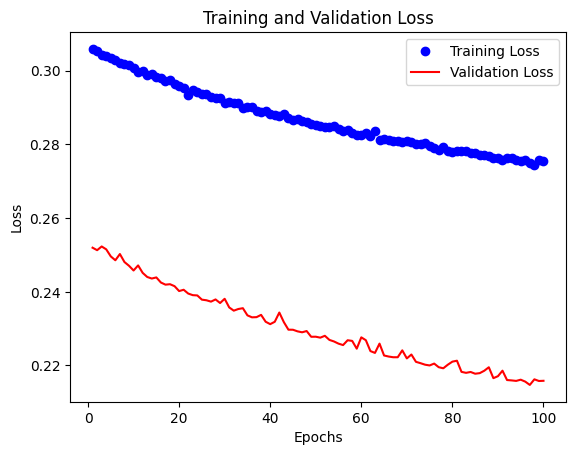

In [45]:
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_val, Y_val))

# Saving the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()